In [1]:
!pip install opendatasets

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
import opendatasets as od
#download data set in kaggle web site

In [4]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: udithaththanagoda
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 4.91MB/s]

In [5]:
data = pd.read_csv("random-linear-regression/test.csv")

In [6]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [7]:
data.shape

(300, 2)

In [8]:
X = data["x"]
y = data["y"]

In [9]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [10]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


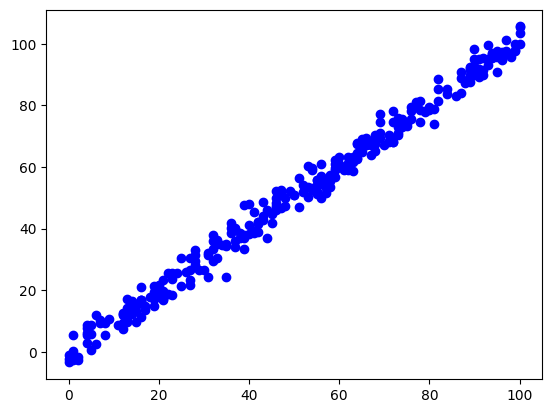

In [11]:
plt.scatter(X, y, c='b')  #color = Blue
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((240,), (60,))

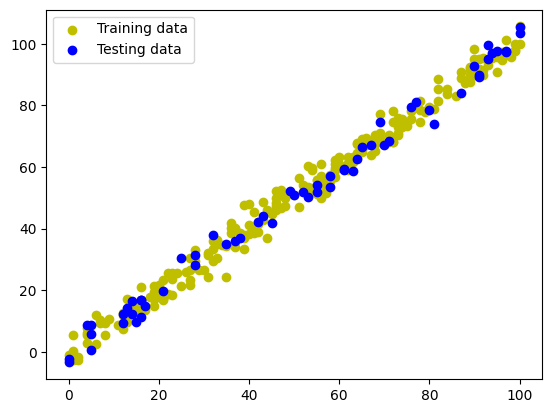

In [15]:
plt.scatter(X_train, y_train, c='y', label='Training data')
plt.scatter(X_test, y_test, c='b', label='Testing data')
plt.legend()
plt.show()

Model Building In Regression problem


In [17]:
#create a model
#by using Sequential Class
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    #create hidden layes and its have 4 neurons
    #We can create many number of hidden layers
    #input shape = 1 (I want to include 1 input)

    tf.keras.layers.Dense(1) #output layer
])
#Dense = Fully Connected Layers

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# compile the model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])
#Add loss function = mae

In [19]:
# train the model
epoch_number = 4  #add epoch count
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 50.4970 - mae: 50.4970
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.4099 - mae: 33.4099 
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5866 - mae: 13.5866 
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3915 - mae: 4.3915 


In [20]:
X_train.shape

(240,)

In [21]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (168.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28 (116.00 B)

In [23]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


array([[101.07957 ],
       [ 85.51204 ],
       [105.52744 ],
       [  6.562403],
       [102.19154 ]], dtype=float32)

In [24]:
y_test[:5]

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


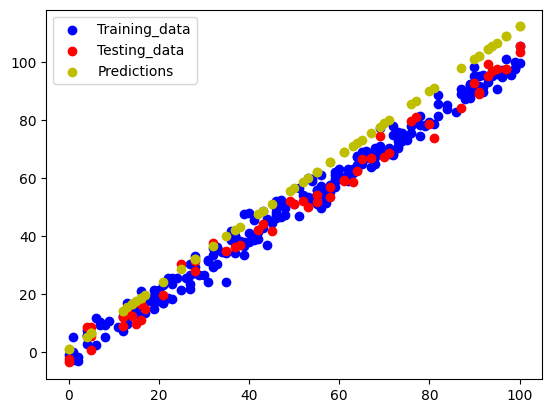

In [27]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='r', label='Testing_data')
plt.scatter(X_test, y_pred, c='y', label='Predictions')
plt.legend()
plt.show()

In [28]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - loss: 6.6699 - mae: 6.6699


[6.8513875007629395, 6.8513875007629395]

In [30]:
# Import the necessary module
from tensorflow.keras.metrics import MeanAbsoluteError

# Create an instance of the MeanAbsoluteError metric
mae_metric = MeanAbsoluteError()

# Update the metric with the true values and the predicted values
mae_metric.update_state(y_test, y_pred)

# Get the result
mae = mae_metric.result().numpy()
print("Mean Absolute Error:", mae)


Mean Absolute Error: 6.8513885


In [32]:
# Import the necessary module
from tensorflow.keras.metrics import MeanSquaredError

# Create an instance of the MeanSquaredError metric
mse_metric = MeanSquaredError()

# Update the metric with the true values and the predicted values
mse_metric.update_state(y_test, y_pred)

# Get the result
mse = mse_metric.result().numpy()
print("Mean Squared Error:", mse)


Mean Squared Error: 61.239388


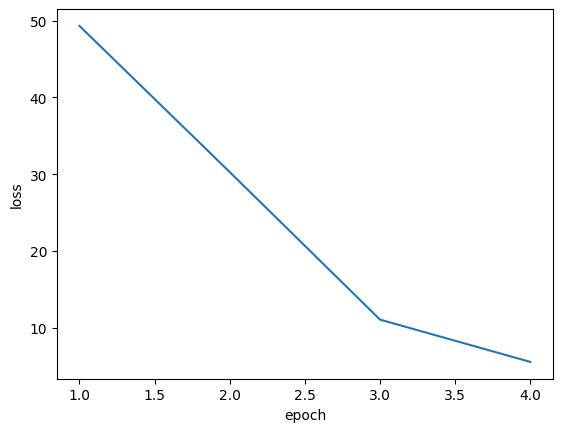

In [33]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

We can improve this model by increasing epoch count and hidden layesr count

In [34]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),#add extra hidden layer
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])


In [36]:
# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 54.7546 - mae: 54.7546
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.2934 - mae: 15.2934
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9271 - mae: 5.9271 
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8024 - mae: 3.8024 


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

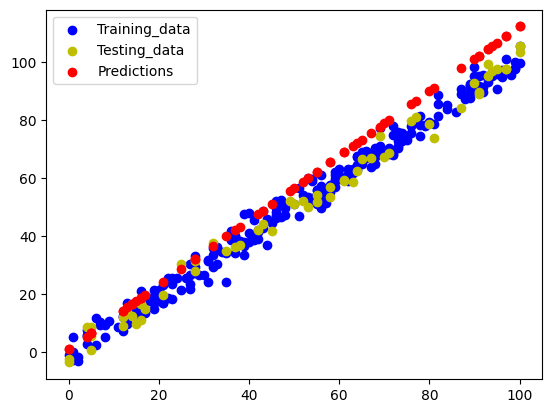

In [38]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

Again model building by using extra hidden layers

In [39]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 17.1894 - mae: 17.1894
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6848 - mae: 2.6848
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6665 - mae: 2.6665 
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4441 - mae: 2.4441 


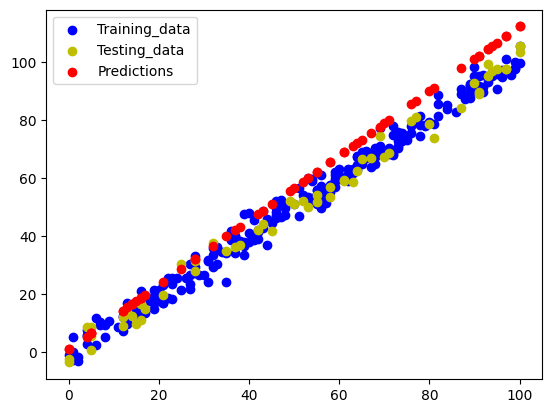

In [40]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

T can change learning rate

In [43]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
             metrics = ["mae"])

# train the model
epoch_number = 10
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 35.3245 - mae: 35.3245
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7993 - mae: 9.7993 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2518 - mae: 6.2518 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4142 - mae: 6.4142 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7916 - mae: 3.7916 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6555 - mae: 2.6555 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7593 - mae: 2.7593 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7713 - mae: 3.7713 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1888 - mae: 4.1888 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4813 - mae: 7.4813 


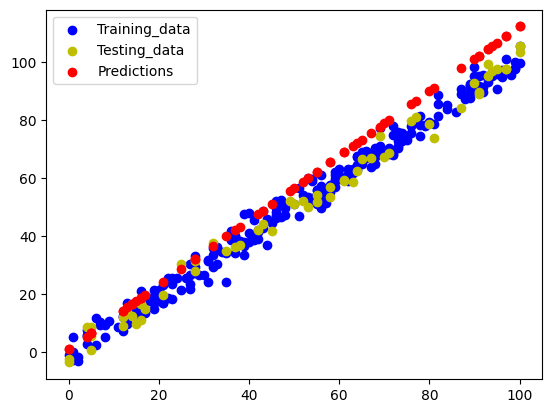

In [44]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

In [45]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
             metrics = ["mae"])

# train the model
epoch_number = 6
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 52.7420 - mae: 52.7420
Epoch 2/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.2586 - mae: 28.2586  
Epoch 3/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6314 - mae: 7.6314 
Epoch 4/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7037 - mae: 5.7037 
Epoch 5/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6602 - mae: 3.6602 
Epoch 6/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0773 - mae: 3.0773 


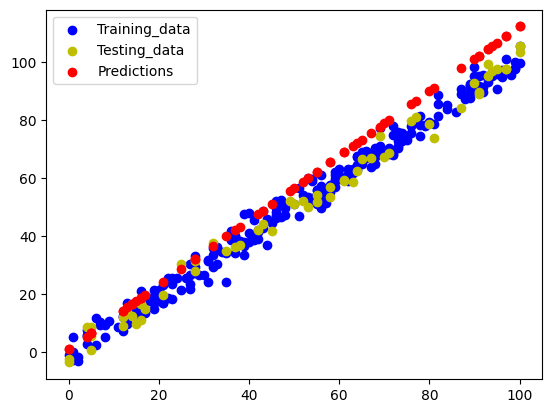

In [46]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

In [47]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - loss: 2.8926 - mae: 2.8926


[2.9544856548309326, 2.9544856548309326]

In [48]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-0.35552758 -0.00980221 -0.11840572 -0.00692473 -0.17885636  0.57677764
  -0.03330451  0.06064521 -0.04711332 -0.05160238]] 
Biases:
 [ 0.27037618 -0.1685724  -0.3604273   0.02564799  0.2686706  -0.23048489
  0.558114    0.47858208 -0.14684856  0.38850808]

Weights:
 [[-1.30918071e-01  1.76121563e-01 -2.92847484e-01 -7.90083781e-02
   2.19442680e-01 -3.80818807e-02  1.04110077e-01 -1.76057741e-02
  -5.12554288e-01 -1.67673618e-01]
 [ 1.59470625e-02 -3.06784242e-01 -4.36476141e-01  3.50460798e-01
   2.38945827e-01  1.26443893e-01 -3.76833379e-01 -5.91739919e-03
   3.66529912e-01 -3.57763946e-01]
 [-1.17576085e-02  3.12296003e-01 -5.82249284e-01 -2.73190707e-01
  -2.29818314e-01  3.81109148e-01  3.82036656e-01  6.70706108e-02
  -6.59496263e-02 -1.17643721e-01]
 [ 3.40042621e-01  3.24646413e-01  6.67975470e-02 -3.75295430e-01
   3.60821515e-01 -5.55976145e-02 -5.54688632e-01 -7.55860761e-04
  -5.41719943e-02 -6.66450411e-02]
 [ 3.68325740e-01 -9.72671956e-02 -2.77484030e-01  

In [50]:
model.save('model_1.keras')

In [51]:
from google.colab import files

# Download the saved model file
files.download('model_1.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
model.save('model_1.h5')

from google.colab import files

# Download the saved model file
files.download('model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>